## 데이터 로드 및 준비

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### DataFrame 생성

In [2]:
# ML DataFrame 만들기
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

path ='/content/drive/MyDrive/2023-2_DEEP/024.에세이_글_평가_데이터/01.데이터/1.Training/라벨링데이터/글짓기_수필형/'
filepath = path + '글짓기_초등_6학년_ESSAY_80711.json'

import json, os

with open(filepath, 'r') as f:
  buf = json.load(f)
  paragraph_txt = buf['paragraph'][0]['paragraph_txt'].replace('#@문장구분#', '')
  print(paragraph_txt)

  paragraph_score = buf['score']['paragraph_score'][0]['paragraph_scoreT_avg']
  print('paragraph_score',paragraph_score)

  essay_score = buf['score']['essay_scoreT_avg']
  print('essay_score', essay_score)

  score = round(paragraph_score+essay_score)
  print('score', score)

  std_grade = {"초등_1학년":8, "초등_2학년":9, "초등_3학년":10, "초등_4학년":11, "초등_5학년":12, "초등_6학년":13, \
               "중등_1학년":14, "중등_2학년":15, "중등_3학년":16, \
               "고등_1학년":17, "고등_2학년":18, "고등_3학년":19}

  student_educated = buf['student']['student_educated']
  print('student_educated', student_educated)

  student_grade = std_grade[buf['student']['student_grade']]
  print('student_grade', student_grade)

  student_reading = buf['student']['student_reading']
  print('student_reading', student_reading)

  essay_prompt_len = len(buf['info']['essay_prompt'])
  print('essay_prompt_len', essay_prompt_len)

  essay_level = buf['info']['essay_level']
  print('essay_level', essay_level)

  essay_len = buf['info']['essay_len']
  print('essay_len', essay_len)

  '''
  -
  - student_educated
  - student_grade
  - student_reading
  - essay_prompt's len
  - essay_level
  - essay_len
  '''

question = []
answer = []


나는 상어다. 그 중에서 나는 백상아리입니다. 나는 대서양, 태평양의 따뜻한 바다에 주로 서식하며 전세계를 돌아다니는 편입니다. 한국, 서해안, 남해안, 동해안 역시 내가 지나가는 거처 주 하나입니다. 한국에도 종종 내가 출물하고 있으며 자주 보이진 않지만 해마다 꼭 나를 잡을려고 하고 있습니다. 작년에는 여수 앞바다에서 나의 동료 중 1명이 붙잡히고 말았습니다.그래서 우리 백상아리 친구들이 잡힌 친구를 위해 잠시 애도하는 시간을 가졌습니다. 나는 연골어류 악상어묵 악상어과의 바닷물고기로 최대 몸 길이는 6.5m 내외입니다.백상아리 친구 가운데 가장 큰 친구는 화석종으로 12m 이상 되기도 합니다.
낵가 바다속을 해엄처 다니고 있을때 범고래와 마주친 적이 있습니다. 똑똑한 범고래를 이길 수 없는 나는 범고래를 피해 도망친 적이 있습니다. 자존심이 상했지만 그래도 죽는 것 보다는 나으니까요.
paragraph_score 2.6666667
essay_score 26.516668
score 29
student_educated True
student_grade 13
student_reading 2
essay_prompt_len 311
essay_level 3
essay_len 450


In [3]:
filelist = os.listdir(path)
# print(filelist)

student_educated_list = []
student_grade_list = []
student_reading_list = []
essay_prompt_len_list = []
essay_level_list = []
essay_len_list = []
score_list = []

for file in filelist:
  if file.endswith('.json'):
    filepath = path + file
    with open(filepath, 'r') as f:
      buf = json.load(f)
      #paragraph_txt = buf['paragraph'][0]['paragraph_txt'].replace('#@문장구분#', '')
      #print(paragraph_txt)

      paragraph_score = buf['score']['paragraph_score'][0]['paragraph_scoreT_avg']
      #print('paragraph_score',paragraph_score)

      essay_score = buf['score']['essay_scoreT_avg']
      #print('essay_score', essay_score)

      score = round(paragraph_score+essay_score)
      #print('score', score)

      std_grade = {"초등_1학년":8, "초등_2학년":9, "초등_3학년":10, "초등_4학년":11, "초등_5학년":12, "초등_6학년":13, \
                  "중등_1학년":14, "중등_2학년":15, "중등_3학년":16, \
                  "고등_1학년":17, "고등_2학년":18, "고등_3학년":19}

      student_educated = buf['student']['student_educated']
      #print('student_educated', student_educated)

      student_grade = std_grade[buf['student']['student_grade']]
      #print('student_grade', student_grade)

      student_reading = buf['student']['student_reading']
      #print('student_reading', student_reading)

      essay_prompt_len = len(buf['info']['essay_prompt'])
      #print('essay_prompt_len', essay_prompt_len)

      essay_level = buf['info']['essay_level']
      #print('essay_level', essay_level)

      essay_len = buf['info']['essay_len']
      #print('essay_len', essay_len)

      student_educated_list.append(student_educated)
      student_grade_list.append(student_grade)
      student_reading_list.append(student_reading)
      essay_prompt_len_list.append(essay_prompt_len)
      essay_level_list.append(essay_level)
      essay_len_list.append(essay_len)
      score_list.append(score)

In [4]:
import pandas as pd
main_df = pd.DataFrame({'student_educated': student_educated_list, 'student_grade': student_grade_list, 'student_reading':student_reading_list, \
                        'essay_prompt_len':essay_prompt_len_list, 'essay_level':essay_level_list, 'essay_len':essay_len_list, \
                        'score':score_list})

main_df


,student_educated,student_grade,student_reading,essay_prompt_len,essay_level,essay_len,score
0,True,15,2,283,2,566,29
1,True,15,1,283,2,696,25
2,True,15,1,283,2,563,28
3,True,15,1,283,2,553,30
4,True,15,1,283,2,549,29
...,...,...,...,...,...,...,...
4569,True,18,3,481,2,998,30
4570,True,18,2,481,2,804,28
4571,True,17,2,421,2,693,27
4572,True,17,1,421,2,679,28


### 데이터 X, y 분류

In [5]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt


In [21]:
X = main_df[main_df.columns[:-1]]
y = main_df[['score']]
y

,score
0,29
1,25
2,28
3,30
4,29
...,...
4569,30
4570,28
4571,27
4572,28


## Ridge Regression 시도

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


alphas = 10**np.linspace(-5,5,101)
coefs = []

# cross validation using RidgeCV
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('cv', RidgeCV(alphas=alphas, scoring='neg_mean_squared_error'))
])

# model = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
pipeline.fit(X_train, y_train)
alpha_opt = pipeline['cv'].alpha_
#print(alpha_opt)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=alpha_opt))
])

pipeline.fit(X_train, y_train)
mse = mean_squared_error(y_test, pipeline.predict(X_test))
print('MSE:',mse)


MSE: 9.675238112827923


In [28]:
from sklearn.metrics import accuracy_score
# accuracy_score(y_test, pipeline.predict(X_test))
print(y_test[100:110])
print(pipeline.predict(X_test)[100:110])

      score
483      26
3412     24
4368     27
420      31
2976     32
792      27
3185     29
1151     24
4156     26
3490     32
[[27.72952881]
 [29.03474632]
 [28.98236735]
 [27.81317169]
 [28.47182526]
 [27.71092804]
 [28.88282293]
 [28.84942093]
 [29.03258943]
 [29.09606828]]


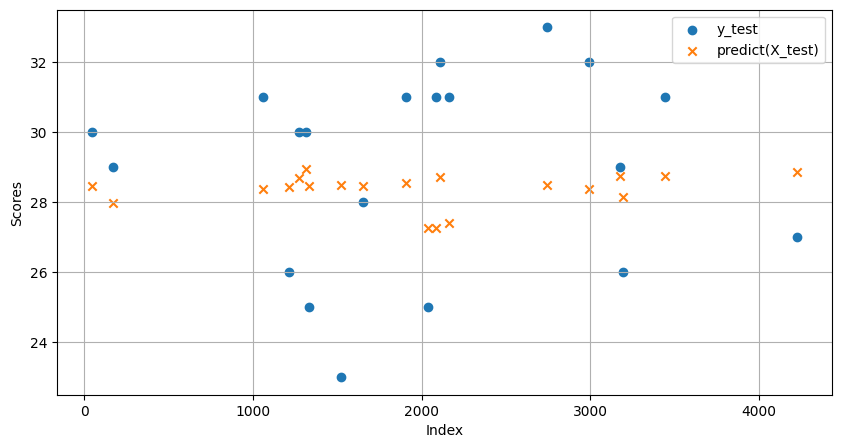

In [38]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test.index[0:20], y_test['score'][0:20], label='y_test', marker='o')
plt.scatter(y_test.index[0:20], pipeline.predict(X_test)[0:20], label='predict(X_test)', marker='x')
plt.xlabel('Index')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 훈련된 Ridge 회귀 모델의 계수(coefficient) 가져오기
ridge_coefs = pipeline.named_steps['regressor'].coef_

# 계수 출력
print(ridge_coefs)

features = ['student_educated',	'student_grade',	'student_reading',	'essay_prompt_len',	'essay_level',	'essay_len']

# 계수의 부호에 따라 영향력의 방향성 결정
for i in range(len(ridge_coefs)):
    print(f"{features[i]}:\t{'Positive' if ridge_coefs[i] > 0 else 'Negative'}")


[ 0.         -0.75362284 -0.03316872  0.45744572 -0.48219352  0.51094989]
student_educated:	Negative
student_grade:	Negative
student_reading:	Negative
essay_prompt_len:	Positive
essay_level:	Negative
essay_len:	Positive


## 데이터 상관관계 분석

In [ ]:
'''
학년별 스코어 점수
에세이 길이별 스코어 점수
에세이 프롬프트 길이별 스코어 점수
학습 여부에 따른 스코어 점수
학생 읽은 책 권수에 따른 스코어 점수
사교육 여부에 따른 스코어 점수
'''

In [ ]:
import pandas as pd
import numpy as np

df = main_df

def average_score_by_column(dataframe, column_name):
  return dataframe.groupby(column_name)['score'].mean()

def median_score_by_column(dataframe, column_name):
  return dataframe.groupby(column_name)['score'].median()

results_mean = {}
results_median = {}
for column in ['student_educated', 'student_grade', 'student_reading', 'essay_prompt_len', 'essay_len']:
  results_mean[column] = average_score_by_column(df, column)
  results_median[column] = median_score_by_column(df, column)

results_mean



{'student_educated': student_educated
 True    28.421294
 Name: score, dtype: float64,
 'student_grade': student_grade
 13    27.883117
 14    28.106502
 15    28.929966
 17    29.256720
 18    28.844444
 19    27.554775
 Name: score, dtype: float64,
 'student_reading': student_reading
 1    28.452395
 2    28.476380
 3    28.233945
 Name: score, dtype: float64,
 'essay_prompt_len': essay_prompt_len
 261    28.106502
 282    27.554775
 283    28.929966
 311    27.883117
 421    29.256720
 481    28.844444
 Name: score, dtype: float64,
 'essay_len': essay_len
 200     24.666667
 201     28.000000
 203     27.000000
 204     23.000000
 205     23.000000
           ...    
 2705    31.000000
 2928    33.000000
 3120    32.000000
 3471    32.000000
 3918    30.000000
 Name: score, Length: 994, dtype: float64}

In [ ]:
results_mean

{'student_educated': student_educated
 True    28.421294
 Name: score, dtype: float64,
 'student_grade': student_grade
 13    27.883117
 14    28.106502
 15    28.929966
 17    29.256720
 18    28.844444
 19    27.554775
 Name: score, dtype: float64,
 'student_reading': student_reading
 1    28.452395
 2    28.476380
 3    28.233945
 Name: score, dtype: float64,
 'essay_prompt_len': essay_prompt_len
 261    28.106502
 282    27.554775
 283    28.929966
 311    27.883117
 421    29.256720
 481    28.844444
 Name: score, dtype: float64,
 'essay_len': essay_len
 200     24.666667
 201     28.000000
 203     27.000000
 204     23.000000
 205     23.000000
           ...    
 2705    31.000000
 2928    33.000000
 3120    32.000000
 3471    32.000000
 3918    30.000000
 Name: score, Length: 994, dtype: float64}

In [ ]:
results_median

{'student_educated': student_educated
 True    29.0
 Name: score, dtype: float64,
 'student_grade': student_grade
 13    28.0
 14    29.0
 15    29.0
 17    30.0
 18    29.0
 19    28.0
 Name: score, dtype: float64,
 'student_reading': student_reading
 1    29.0
 2    29.0
 3    29.0
 Name: score, dtype: float64,
 'essay_prompt_len': essay_prompt_len
 261    29.0
 282    28.0
 283    29.0
 311    28.0
 421    30.0
 481    29.0
 Name: score, dtype: float64,
 'essay_len': essay_len
 200     26.0
 201     28.0
 203     27.0
 204     24.0
 205     23.0
         ... 
 2705    31.0
 2928    33.0
 3120    32.0
 3471    32.0
 3918    30.0
 Name: score, Length: 994, dtype: float64}

### 데이터 시각화

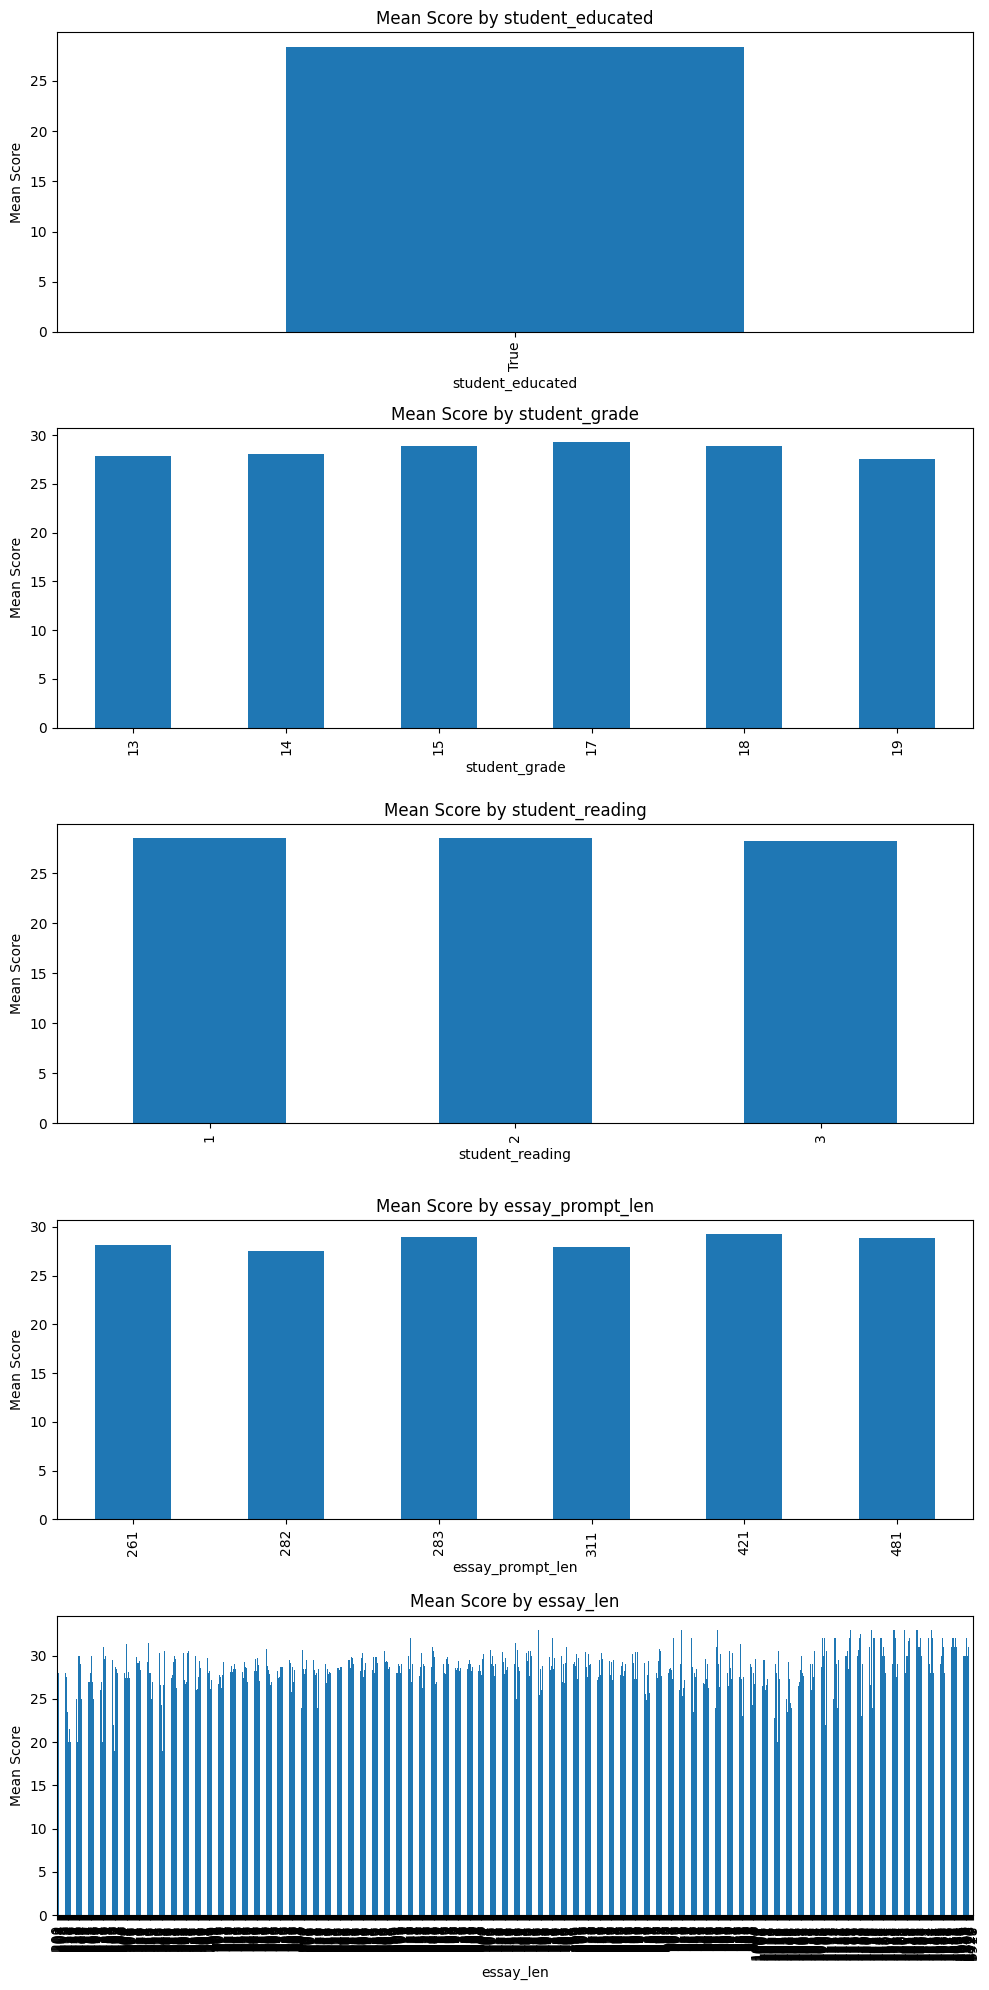

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'results_mean' contains the mean score data as computed in the previous steps
# Plotting each column's mean score

fig, axes = plt.subplots(nrows=len(results_mean), ncols=1, figsize=(10, 20))

for i, (column, means) in enumerate(results_mean.items()):
    means.plot(kind='bar', ax=axes[i], title=f"Mean Score by {column}")
    axes[i].set_ylabel("Mean Score")
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()
